In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc, font_manager
%matplotlib inline
plt.rc('font', family='Malgun Gothic', size=10)

In [2]:
# 원본 데이터 불러오기

# 내국인 데이터
raw_내 = pd.read_csv('Desktop/빅콘테스트/데이터 종합/02_카드매출데이터(신한카드)/CARD_SPENDING_RESIDENT/CARD_SPENDING_RESIDENT.txt', delimiter='\t')

In [3]:
# 수치데이터 제외하고 한국어로 바꾸기
raw_내.columns=['기준일자', '구코드', '행정동코드', '업종코드','성별','연령', '이용건수', '이용금액']

구코드={140: '서울중구', 350: '노원구', 260: '수성구', 110: '대구중구'}
raw_내.구코드.replace(구코드, inplace=True)

업종코드={10:'숙박', 20:'레저용품', 21:'레저업소', 22:'문화취미', 30:'가구', 31:'전기', 32:'주방용구', 33:'연료판매', 34:'광학제품',
     35:'가전', 40:'유통업', 42:'의복', 43:'직물', 44:'신변잡화', 50:'서적문구', 52:'사무통신', 60:'자동차판매', 62:'자동차정비',
      70:'의료기관', 71:'보건위생', 80:'요식업소', 81:'음료식품', 92:'수리서비스'}
raw_내.업종코드.replace(업종코드, inplace=True)

성별={'F': '여', 'M': '남'}
raw_내.성별.replace(성별, inplace=True)


raw_내

,기준일자,구코드,행정동코드,업종코드,성별,연령,이용건수,이용금액
0,20190201,대구중구,517,숙박,여,25,11,595
1,20190201,대구중구,517,숙박,여,50,5,243
2,20190201,대구중구,517,숙박,여,55,5,27
3,20190201,대구중구,517,숙박,남,20,11,243
4,20190201,대구중구,517,숙박,남,25,11,433
...,...,...,...,...,...,...,...,...
2537748,20200531,노원구,720,음료식품,남,45,19,127
2537749,20200531,노원구,720,음료식품,남,50,33,211
2537750,20200531,노원구,720,음료식품,남,55,9,61
2537751,20200531,노원구,720,음료식품,남,60,19,194


In [4]:
raw_내.head()

,기준일자,구코드,행정동코드,업종코드,성별,연령,이용건수,이용금액
0,20190201,대구중구,517,숙박,여,25,11,595
1,20190201,대구중구,517,숙박,여,50,5,243
2,20190201,대구중구,517,숙박,여,55,5,27
3,20190201,대구중구,517,숙박,남,20,11,243
4,20190201,대구중구,517,숙박,남,25,11,433


In [ ]:
# 연월 컬럼 만들기
# raw_내['연월']= [int(x / 100) for x in raw_내['기준일자']]
# raw_내

In [ ]:
# 기준일자 컬럼을 날짜형식으로 바꾸기
# raw_내['기준일자']=raw_내['기준일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d')).copy()
# raw_내

In [5]:
지역통합raw = raw_내.groupby(by=['업종코드','기준일자']).sum()
지역통합raw.reset_index('기준일자', inplace=True)
지역통합raw.reset_index('업종코드', inplace=True)

지역통합raw

,업종코드,기준일자,행정동코드,연령,이용건수,이용금액
0,가구,20190201,11092,850,94,20244
1,가구,20190202,19468,1455,188,64324
2,가구,20190203,6201,460,54,10250
3,가구,20190204,3048,195,38,10292
4,가구,20190205,635,30,5,6192
...,...,...,...,...,...,...
5527,직물,20200527,54984,4575,935,106442
5528,직물,20200528,61381,4995,1069,127852
5529,직물,20200529,56261,4730,879,151063
5530,직물,20200530,63769,5055,1075,122693


In [7]:
# 연월 컬럼 만들기
지역통합raw['연월']= [int(x / 100) for x in 지역통합raw['기준일자']]
지역통합raw

,업종코드,기준일자,행정동코드,연령,이용건수,이용금액,연월
0,가구,20190201,11092,850,94,20244,201902
1,가구,20190202,19468,1455,188,64324,201902
2,가구,20190203,6201,460,54,10250,201902
3,가구,20190204,3048,195,38,10292,201902
4,가구,20190205,635,30,5,6192,201902
...,...,...,...,...,...,...,...
5527,직물,20200527,54984,4575,935,106442,202005
5528,직물,20200528,61381,4995,1069,127852,202005
5529,직물,20200529,56261,4730,879,151063,202005
5530,직물,20200530,63769,5055,1075,122693,202005


In [8]:
지역통합raw[(지역통합raw['연월']==201902) & (지역통합raw['업종코드']=='가구')]

,업종코드,기준일자,행정동코드,연령,이용건수,이용금액,연월
0,가구,20190201,11092,850,94,20244,201902
1,가구,20190202,19468,1455,188,64324,201902
2,가구,20190203,6201,460,54,10250,201902
3,가구,20190204,3048,195,38,10292,201902
4,가구,20190205,635,30,5,6192,201902
5,가구,20190206,7632,450,69,21724,201902
6,가구,20190207,11848,785,99,34352,201902
7,가구,20190208,16351,1120,142,52945,201902
8,가구,20190209,24513,1625,253,87597,201902
9,가구,20190210,20955,1390,186,105715,201902


In [9]:
# 월별로 일평균 데이터 생성( 월마다 날짜수가 다르기때문에)
월별추이 = 지역통합raw.groupby(by=['업종코드','연월']).mean()[['이용건수', '이용금액']]
월별추이.reset_index('연월', inplace=True)
월별추이

,연월,이용건수,이용금액
업종코드,,,
가구,201902,142.250000,56197.392857
가구,201903,169.677419,70607.451613
가구,201904,164.600000,56652.400000
가구,201905,139.193548,64782.387097
가구,202002,99.655172,64006.586207
...,...,...,...
직물,201905,541.612903,73280.290323
직물,202002,256.172414,53361.137931
직물,202003,259.903226,45291.709677


In [10]:
월별추이['연월'] = 월별추이['연월'].astype('str')
월별추이

,연월,이용건수,이용금액
업종코드,,,
가구,201902,142.250000,56197.392857
가구,201903,169.677419,70607.451613
가구,201904,164.600000,56652.400000
가구,201905,139.193548,64782.387097
가구,202002,99.655172,64006.586207
...,...,...,...
직물,201905,541.612903,73280.290323
직물,202002,256.172414,53361.137931
직물,202003,259.903226,45291.709677


# 연령대_업종별

In [11]:
지역통합_연령raw = raw_내.groupby(by=['업종코드','연령','기준일자']).sum()
지역통합_연령raw.reset_index('기준일자', inplace=True)
지역통합_연령raw.reset_index('연령', inplace=True)
지역통합_연령raw.reset_index('업종코드', inplace=True)


지역통합_연령raw

,업종코드,연령,기준일자,행정동코드,이용건수,이용금액
0,가구,20,20190206,560,5,1704
1,가구,20,20190208,1875,15,201
2,가구,20,20190209,1302,10,97
3,가구,20,20190210,619,5,45
4,가구,20,20190212,619,5,20
...,...,...,...,...,...,...
53331,직물,65,20200527,8347,193,18372
53332,직물,65,20200528,7265,230,24861
53333,직물,65,20200529,9710,215,29715
53334,직물,65,20200530,9206,219,21581


In [12]:
# 연월 컬럼 만들기
지역통합_연령raw['연월']= [int(x / 100) for x in 지역통합_연령raw['기준일자']]
지역통합_연령raw

,업종코드,연령,기준일자,행정동코드,이용건수,이용금액,연월
0,가구,20,20190206,560,5,1704,201902
1,가구,20,20190208,1875,15,201,201902
2,가구,20,20190209,1302,10,97,201902
3,가구,20,20190210,619,5,45,201902
4,가구,20,20190212,619,5,20,201902
...,...,...,...,...,...,...,...
53331,직물,65,20200527,8347,193,18372,202005
53332,직물,65,20200528,7265,230,24861,202005
53333,직물,65,20200529,9710,215,29715,202005
53334,직물,65,20200530,9206,219,21581,202005


In [13]:
지역통합_연령raw['연월'] = 지역통합_연령raw['연월'].astype('str')
지역통합_연령raw

,업종코드,연령,기준일자,행정동코드,이용건수,이용금액,연월
0,가구,20,20190206,560,5,1704,201902
1,가구,20,20190208,1875,15,201,201902
2,가구,20,20190209,1302,10,97,201902
3,가구,20,20190210,619,5,45,201902
4,가구,20,20190212,619,5,20,201902
...,...,...,...,...,...,...,...
53331,직물,65,20200527,8347,193,18372,202005
53332,직물,65,20200528,7265,230,24861,202005
53333,직물,65,20200529,9710,215,29715,202005
53334,직물,65,20200530,9206,219,21581,202005


In [17]:
지역통합_연령raw1 = 지역통합_연령raw.groupby(by=['업종코드', '연령', '연월']).mean()
지역통합_연령raw1.reset_index('연월', inplace=True)
지역통합_연령raw1.reset_index('연령', inplace=True)

#연령그룹 컬럼 만들기
지역통합_연령raw1['연령그룹'] = 지역통합_연령raw1['연령']

연령그룹={20: '25세 미만', 25: '25~39세', 30: '25~39세', 35: '25~39세', 40: '40~59세', 45: '40~59세', 50: '40~59세', 55: '40~59세', 
      60: '60세이상', 65: '60세이상'}
지역통합_연령raw1['연령그룹'].replace(연령그룹, inplace=True)
지역통합_연령raw1

,연령,연월,기준일자,행정동코드,이용건수,이용금액,연령그룹
업종코드,,,,,,,
가구,20,201902,2.019022e+07,946.000000,8.625000,1054.375000,25세 미만
가구,20,201903,2.019032e+07,808.111111,7.111111,463.611111,25세 미만
가구,20,201904,2.019042e+07,1063.562500,9.500000,878.062500,25세 미만
가구,20,201905,2.019051e+07,904.444444,7.500000,99.500000,25세 미만
가구,20,202002,2.020021e+07,648.000000,4.500000,807.250000,25세 미만
...,...,...,...,...,...,...,...
직물,65,201905,2.019052e+07,5113.516129,84.032258,11118.838710,60세이상
직물,65,202002,2.020021e+07,3594.714286,40.000000,5937.464286,60세이상
직물,65,202003,2.020032e+07,3680.566667,43.933333,10011.566667,60세이상


In [18]:
지역통합_연령raw1 = 지역통합_연령raw1[[ '연령그룹', '이용금액', '연월']]
지역통합_연령raw1.head()

,연령그룹,이용금액,연월
업종코드,,,
가구,25세 미만,1054.375000,201902
가구,25세 미만,463.611111,201903
가구,25세 미만,878.062500,201904
가구,25세 미만,99.500000,201905
가구,25세 미만,807.250000,202002


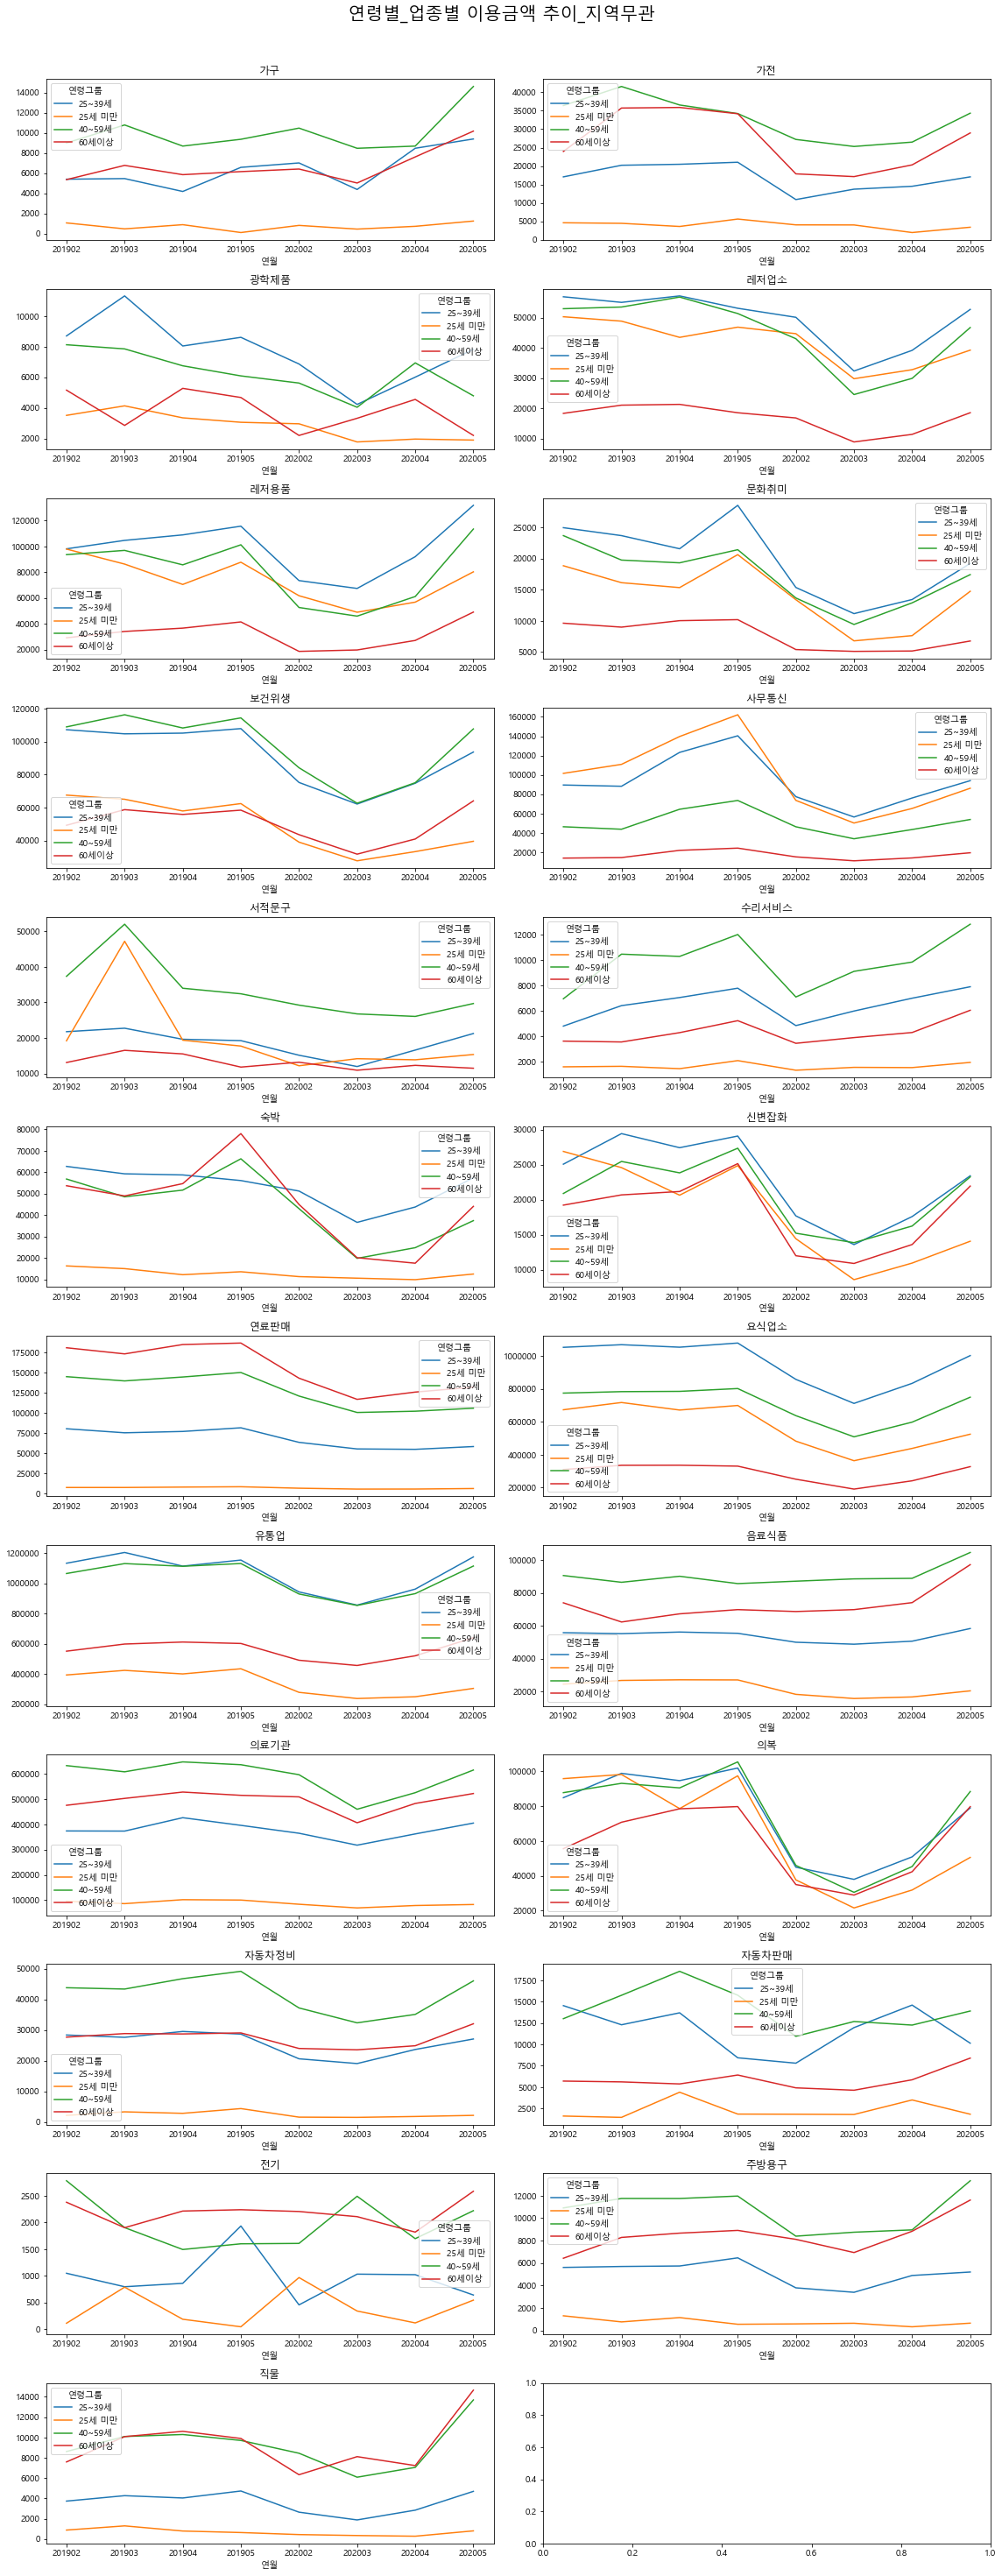

In [19]:
plt.rc('font', family='Malgun Gothic', size=10)
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(16,40))
fig.suptitle('연령별_업종별 이용금액 추이_지역무관', y=1.02, size=20)

for i, f in enumerate(지역통합_연령raw1.index.unique()):
    r = int(i / 2) #행별로 그래프 배치하기
    c = i % 2 #열별로 그래프 배치하기
    item_df = 지역통합_연령raw1[지역통합_연령raw1.index== f ]
    line = item_df.pivot_table(index='연월', columns='연령그룹', values='이용금액').plot(ax=axes[r][c])
    line.set_title(f)

    
fig.tight_layout()
    
    
# a = plt.gcf()
# a.savefig('연령별 2019년 대비 2020년 이용건수 비교_지역무관.png')

In [103]:
raw_내[raw_내.업종코드=='의료기관']

,기준일자,구코드,행정동코드,업종코드,성별,연령,이용건수,이용금액
68,20190201,대구중구,517,의료기관,여,20,11,170
69,20190201,대구중구,517,의료기관,여,35,32,790
70,20190201,대구중구,517,의료기관,여,40,54,4997
71,20190201,대구중구,517,의료기관,여,45,54,3700
72,20190201,대구중구,517,의료기관,여,50,87,9635
...,...,...,...,...,...,...,...,...
2537482,20200531,노원구,700,의료기관,남,65,9,198
2537572,20200531,노원구,710,의료기관,남,30,5,40
2537573,20200531,노원구,710,의료기관,남,40,5,52
2537574,20200531,노원구,710,의료기관,남,45,5,52
